# Principal Components 

### Lyrics dataset

Conduct PCA on the following input lyrics data then compare the performance of PCA:
#### 1. term frequecny (tf)
#### 2. term frequency-inverse document fequency
    

Resource:
1. notebook **PCA - MIKE®**
2. [sebastianraschka.com](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)

Recap:
1. Take matrix of document term frequency
2. Apply the function of Principle Component
3. Extract Eigen Value
4. Extract Eigen Vector (PCA loading to original variables)
5. Build loading matrix (w_matrix)
6. Attain PC scores for original rows

### Libraries

In [2]:
import pickle
import pandas as pd
import numpy as np
import os
import itertools as it
import matplotlib.pyplot as plt
import math
import h5py 
import os
import itertools
import re
from sklearn.preprocessing import scale
%matplotlib inline

In [3]:
save_load_path = '/Users/Dannyhsiao/Dropbox/MA755 Public (1)/pynotes/Danny-Eole-Yuchen/Pickles'

### *[MIKE®]* Define Functions 
#### `pcf` 
#### `extract_eign` 
#### `var_explained` 

In [4]:
def pcf(matrix):
    #scale the data
    A_s = scale(matrix, with_mean=True,with_std=True,axis=0)
    #covariance matrix
    A_c = np.cov(A_s.T)
    #Get the eign values and eign vectors
    eig_val_cov, eig_vec_cov = np.linalg.eig(A_c)
    eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i])
             for i in range(len(eig_val_cov))]
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort
    eig_pairs.reverse
    return(eig_pairs)

def extract_eign(pair):
    eig_val=[0]*len(pair)
    index=0
    for i in pair:
        eig_val[index]=i[0]
        index+=1
    return(eig_val)

def var_explained(eig,i):
    cum_per=0
    per_var=0
    for e_val in (eig[0:i]):
        per_var = round((e_val / len(eig)),3)
        cum_per+=per_var
    return(cum_per)

### Load the Tf weighted document-term matrix

In [7]:
dtm_tf_matrix = np.load(save_load_path+'/DTM/tf_matrix.npy')

print ("document term matrix:")
print ()
print (dtm_tf_matrix)
print ()
print ("shape:{shape}".format(shape = dtm_tf_matrix.shape))

document term matrix:

[[ -2.04044136e+00   1.38740446e+00   1.62262768e+00 ...,   5.98539632e-02
   -3.06362726e-02  -7.70359813e-02]
 [ -8.08475343e-01  -1.48682333e+00  -2.97406865e+00 ...,  -2.31249198e-01
   -4.46965697e-03  -1.63722242e-01]
 [  1.03396539e+01   5.07199971e-01  -4.57643192e+00 ...,  -3.03602508e-01
   -3.23069345e-02  -2.54962542e-01]
 ..., 
 [  6.27230468e-01   3.84683221e-01  -4.74095694e-01 ...,  -1.58452309e-01
    5.72684497e-01   1.65609787e-01]
 [  1.30654799e+00   7.04192152e-01  -2.29427825e-01 ...,  -6.18252800e-02
   -1.20138367e-01  -1.82012400e-01]
 [ -1.51836034e+00  -4.17487421e-01  -9.08351420e-01 ...,   1.35764117e-02
    9.59965630e-02  -3.93183965e-02]]

shape:(10352, 800)


### Get series of eign values & eign vectors for the document term matrix

In [8]:
pc_tf = pcf(dtm_tf_matrix)
print(pc_tf[0])

(1.0000966090232324, array([ -6.39142297e-03+0.j,  -9.08198819e-03+0.j,   4.65933414e-03+0.j,
        -1.03768035e-03+0.j,  -4.30024653e-03+0.j,   1.58824426e-03+0.j,
        -3.08663224e-03+0.j,  -2.08912807e-03+0.j,  -2.45208481e-03+0.j,
         2.13108860e-03+0.j,   1.94037708e-03+0.j,   8.27819889e-04+0.j,
        -4.97320306e-04+0.j,   1.39722346e-03+0.j,   9.00331972e-04+0.j,
         1.24699662e-03+0.j,   3.62385162e-03+0.j,  -1.93233660e-04+0.j,
         4.19675027e-04+0.j,   7.31673592e-05+0.j,  -1.47014515e-03+0.j,
         3.06252382e-04+0.j,   8.92612190e-04+0.j,   6.53661718e-04+0.j,
         7.53888621e-05+0.j,  -3.44333228e-04+0.j,   1.13361918e-03+0.j,
        -4.38582628e-04+0.j,   2.59184796e-03+0.j,  -6.10400306e-04+0.j,
         5.52404950e-03+0.j,  -2.33762123e-03+0.j,   2.42441495e-04+0.j,
         2.28807447e-03+0.j,  -1.69372573e-03+0.j,  -1.01498766e-03+0.j,
         9.19141763e-04+0.j,   2.02985164e-03+0.j,   3.19093498e-03+0.j,
         4.31016305e-03+0.j,  

We plot the eign values of all PCs. As a rule of thumb, we drop PCs if its eign value lower than 1.

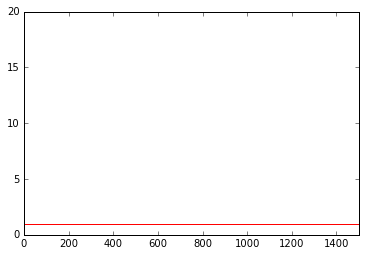

In [10]:
pceign_tf=extract_eign(pc_tf)
plt.plot(pceign_tf)
plt.axis([0,1500,0,20])
plt.axhline(y=1,color='r')

** *Choose number of PCs based on graph* !! **

In [1]:
num_pc_tf = 718
var_explained(pceign_tf,num_pc_tf)

NameError: name 'var_explained' is not defined